In [1]:
pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Native libraries
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import StandardScaler # -> think of StandardScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [ ]:
df = pd.read_excel("Time_Series_Merchants_Transactions_Anonymized.xlsx")

In [ ]:
df2 = df.set_index('Merchant Name')

In [ ]:
df_tr = df2.transpose(copy=True)

In [ ]:
names = list(df_tr.columns)

In [ ]:
#pd.Series(range(26), index=pd.date_range("2020-08", freq="M", periods=26))
pd.Series(pd.period_range("8/1/2020", freq="M", periods=26))

0     2020-08
1     2020-09
2     2020-10
3     2020-11
4     2020-12
5     2021-01
6     2021-02
7     2021-03
8     2021-04
9     2021-05
10    2021-06
11    2021-07
12    2021-08
13    2021-09
14    2021-10
15    2021-11
16    2021-12
17    2022-01
18    2022-02
19    2022-03
20    2022-04
21    2022-05
22    2022-06
23    2022-07
24    2022-08
25    2022-09
dtype: period[M]

In [ ]:
df_tr= df_tr.rename(index={'Merchant Name': 'index'})
df_tr = df_tr.set_index(pd.Series(pd.period_range("8/1/2020", freq="M", periods=26)))

In [ ]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 26 entries, 2020-08 to 2022-09
Freq: M
Columns: 1913 entries, Merchant 1 to Merchant 1913
dtypes: int64(1913)
memory usage: 388.8 KB


In [ ]:
df_tr.iloc[:,1]

2020-08     21
2020-09     24
2020-10     13
2020-11     21
2020-12      4
2021-01     80
2021-02      1
2021-03     24
2021-04    183
2021-05     31
2021-06     44
2021-07     16
2021-08     37
2021-09     27
2021-10     18
2021-11     27
2021-12     11
2022-01    119
2022-02     62
2022-03     52
2022-04    432
2022-05     86
2022-06    108
2022-07     72
2022-08    101
2022-09     80
Freq: M, Name: Merchant 2, dtype: int64

In [ ]:
scaler = StandardScaler()
Scale_df2 = scaler.fit_transform(df_tr)
Scale_df3 = scaler.fit_transform(df2)

In [ ]:
len(Scale_df3)

1913

In [ ]:
Scale_df3.shape[1]

26

In [ ]:
som = MiniSom(Scale_df3.shape[1], Scale_df3.shape[0], Scale_df3.shape[1]*Scale_df3.shape[0], sigma=0.3, learning_rate=0.01) 
som.train(Scale_df3, 500) # trains the SOM with 100 iterations

3

In [ ]:
#NOT RUN
fig, axs = plt.subplots(400,6,figsize=(25,25))
fig.suptitle('Series')
for i in range(400):
    for j in range(6):
        if i*4+j+1>len(df_tr): # pass the others that we can't fill
            continue
        axs[i, j].plot(df_tr.iloc[:,i*4+j].values)
        axs[i, j].set_title(names[i*4+j])
plt.tight_layout()
plt.show();

In [ ]:
Scale_df2

array([[-1.66058892, -0.52155553, -0.44795312, ..., -0.2       ,
        -0.2       , -0.2       ],
       [-1.90575888, -0.48611883, -0.44795312, ..., -0.2       ,
        -0.2       , -0.2       ],
       [-1.72280732, -0.6160534 , -0.5044909 , ..., -0.2       ,
        -0.2       , -0.2       ],
       ...,
       [ 0.68618642,  0.08086837, -0.44795312, ..., -0.2       ,
        -0.2       , -0.2       ],
       [ 1.20572085,  0.42342313, -0.44795312, ..., -0.2       ,
        -0.2       , -0.2       ],
       [ 1.21333383,  0.17536623, -0.5044909 , ...,  5.        ,
         5.        ,  5.        ]])

In [ ]:
#SOM method ---> 

In [ ]:

# I didn't see its significance but to make the map square,
# I calculated square root of map size which is 
# the square root of the number of series
# for the row and column counts of som

som = MiniSom(som_x, som_y,len(Scale_df2[0]), sigma=0.3, learning_rate = 0.1)

som.random_weights_init(Scale_df2)
som.train(Scale_df2, 50000)

In [ ]:
def plot_som_series_averaged_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=0),c="red")
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

In [ ]:
som_x_1 = som_y_1 = math.ceil(math.sqrt(math.sqrt(len(Scale_df3))))
# I didn't see its significance but to make the map square,
# I calculated square root of map size which is 
# the square root of the number of series
# for the row and column counts of som

som = MiniSom(som_x_1, som_y_1,len(Scale_df3[0]), sigma=0.3, learning_rate = 0.01)

som.random_weights_init(Scale_df3)
som.train(Scale_df3, 50000)

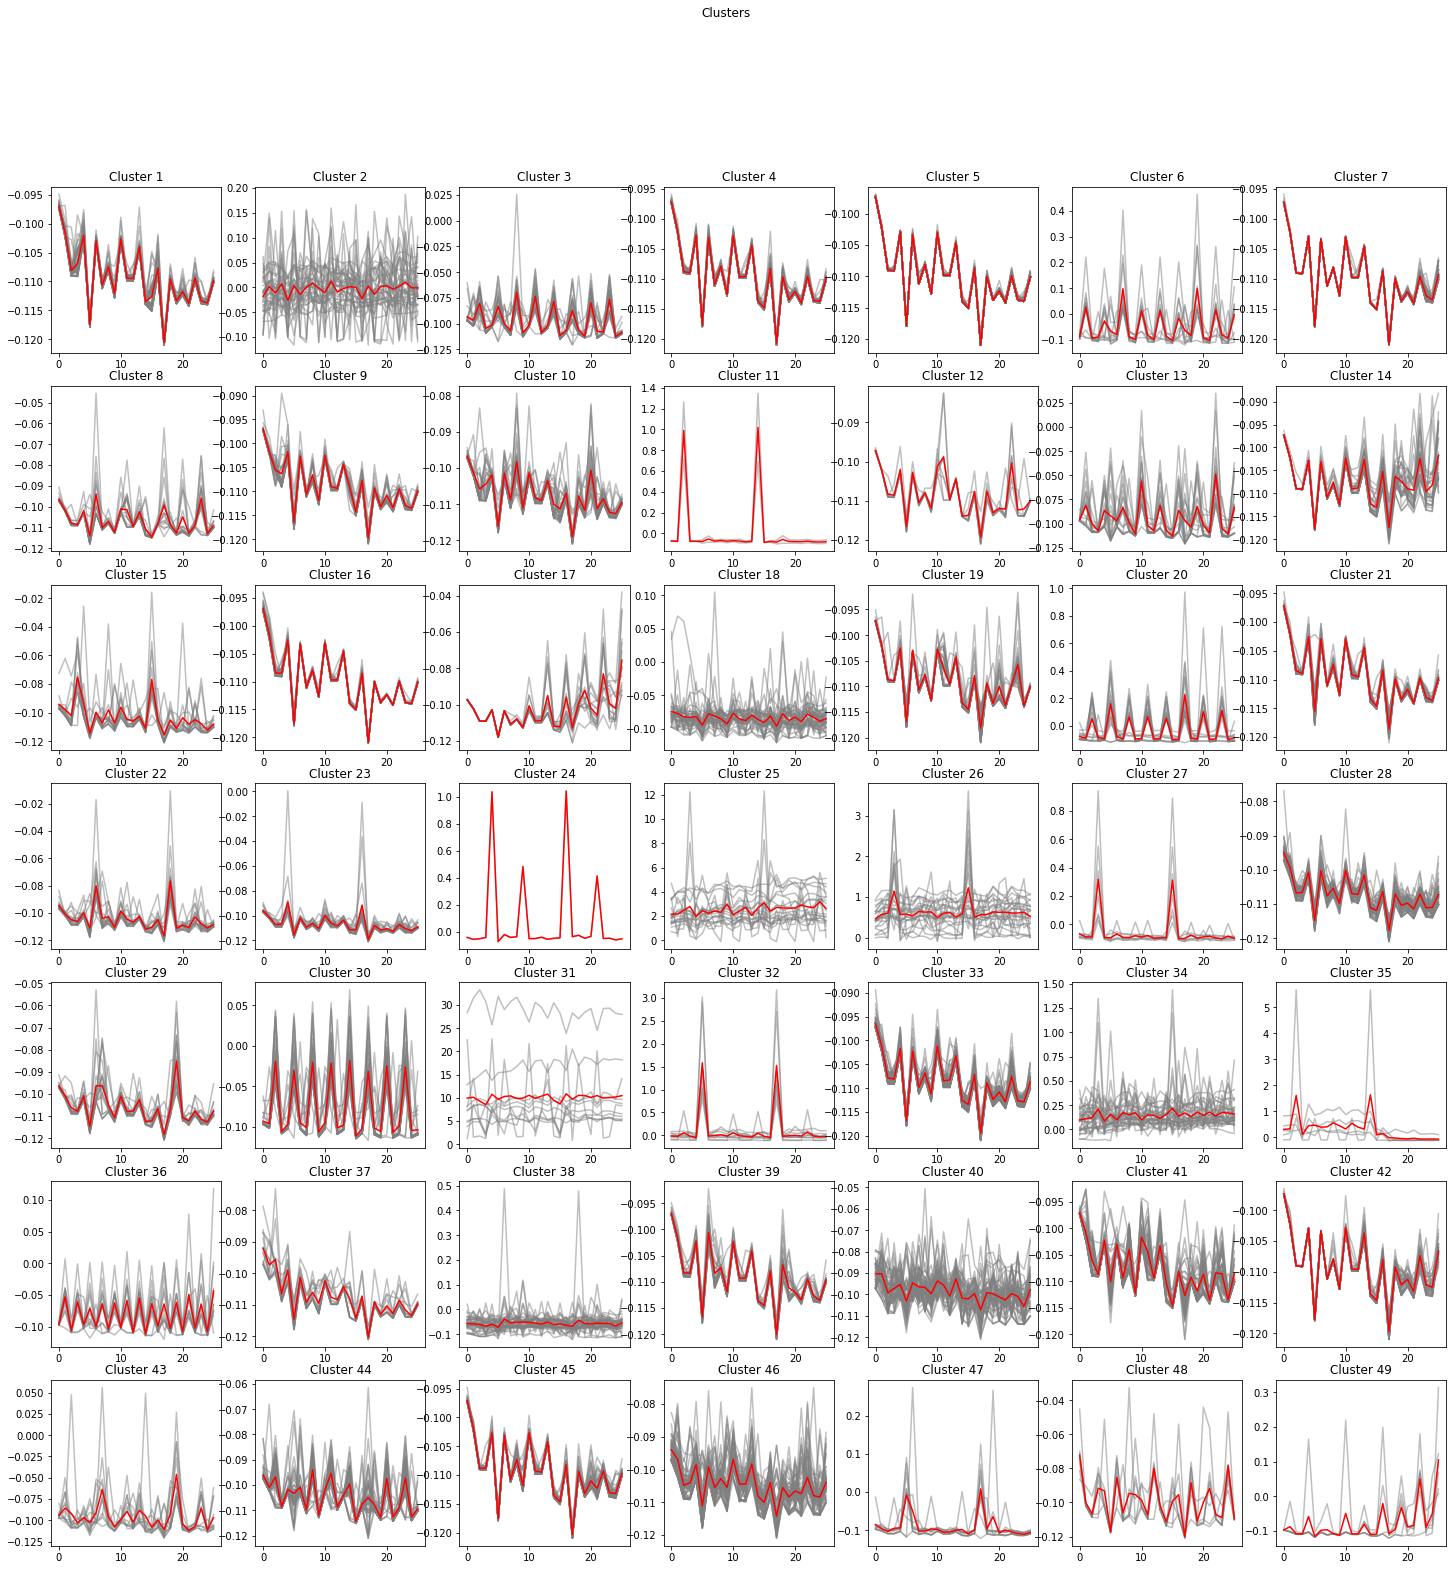

In [ ]:
win_map_1 = som.win_map(Scale_df3)
plot_som_series_averaged_center(som_x_1, som_y_1, win_map_1)

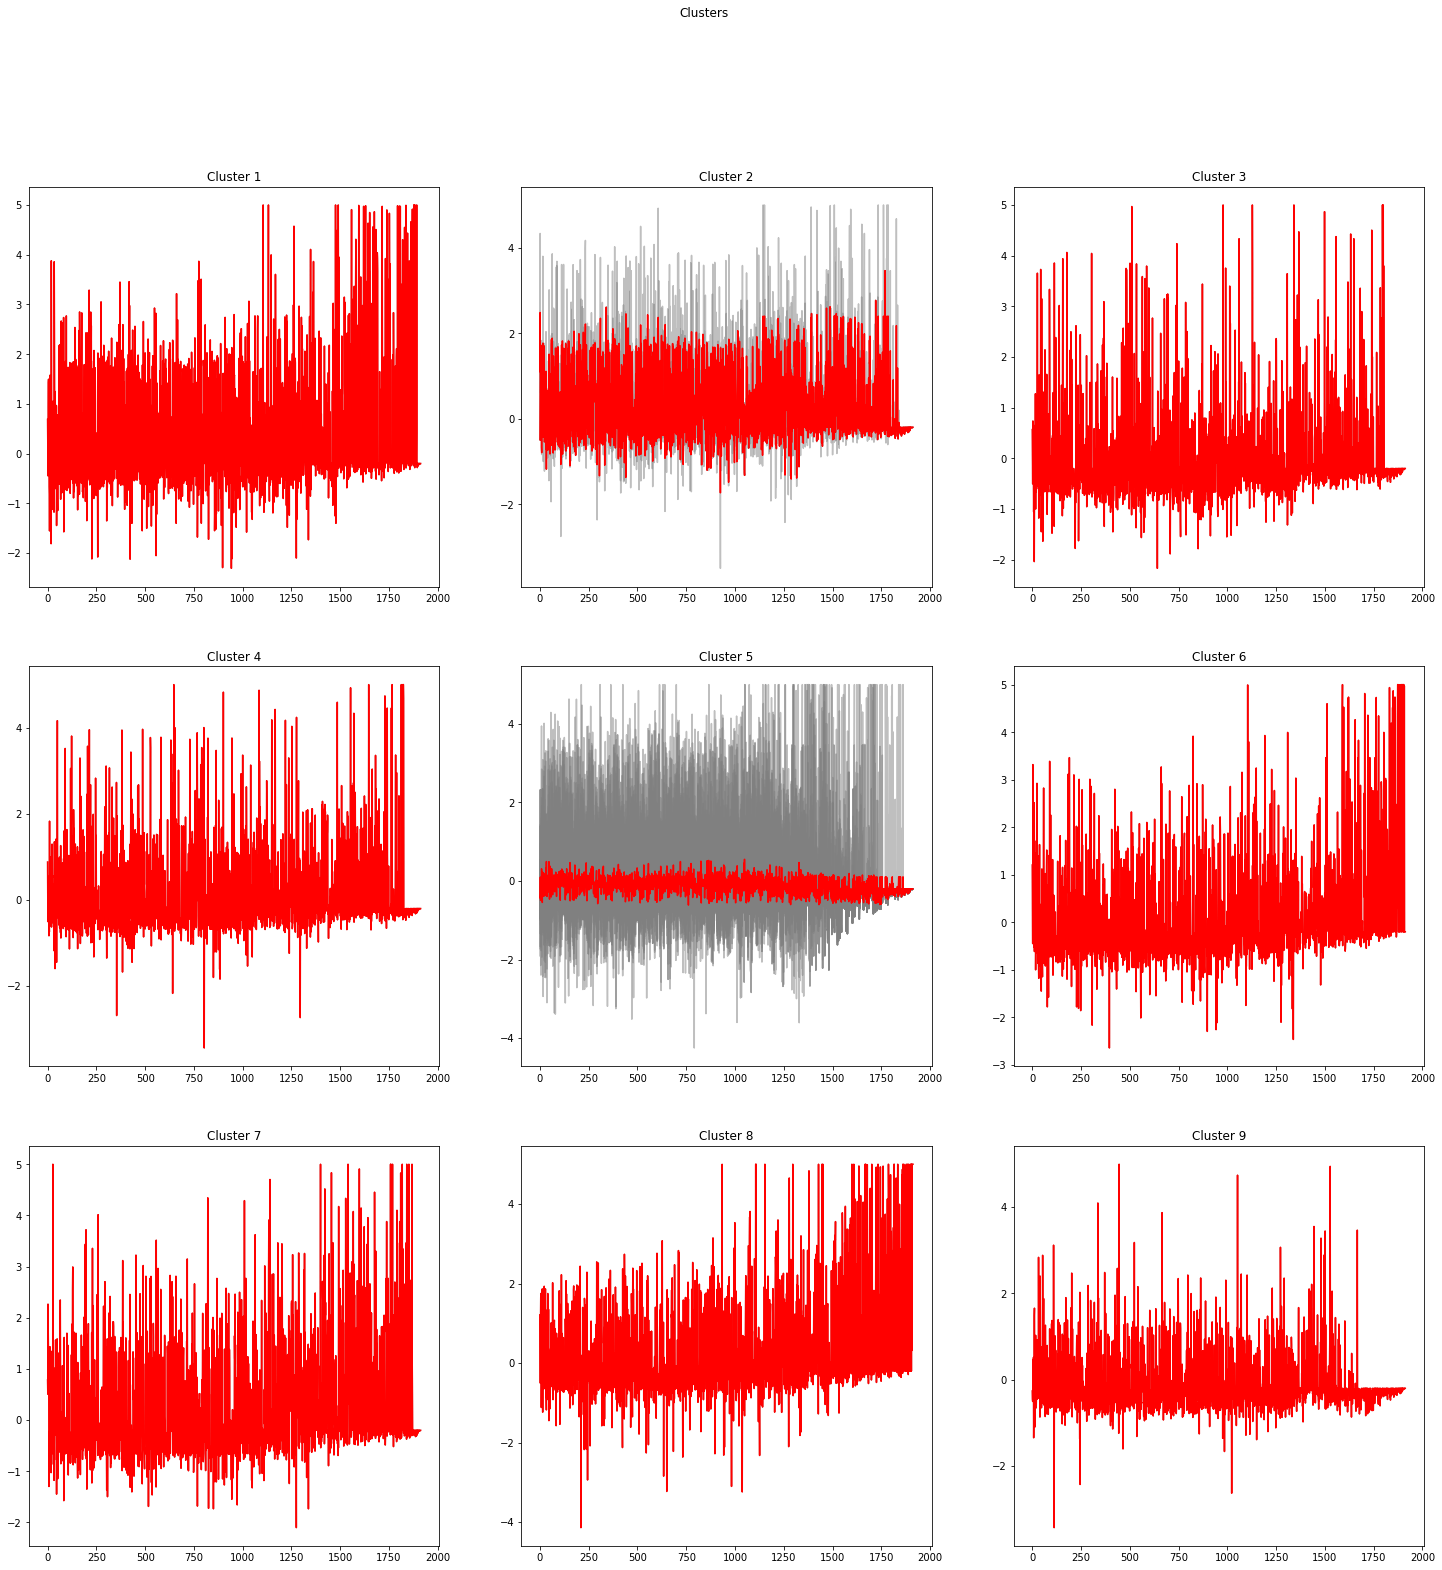

In [ ]:
win_map = som.win_map(Scale_df2)
plot_som_series_averaged_center(som_x, som_y, win_map)

In [ ]:
df_np = df_tr.to_numpy()
df_np

array([[416772,     21,      1, ...,      0,      0,      0],
       [395324,     24,      1, ...,      0,      0,      0],
       [411329,     13,      0, ...,      0,      0,      0],
       ...,
       [622073,     72,      1, ...,      0,      0,      0],
       [667523,    101,      1, ...,      0,      0,      0],
       [668189,     80,      0, ...,      1,      1,     11]])

In [ ]:
len(df_tr.columns)

1913

array([[-1.66058892, -0.52155553, -0.44795312, ..., -0.2       ,
        -0.2       , -0.2       ],
       [-1.90575888, -0.48611883, -0.44795312, ..., -0.2       ,
        -0.2       , -0.2       ],
       [-1.72280732, -0.6160534 , -0.5044909 , ..., -0.2       ,
        -0.2       , -0.2       ],
       ...,
       [ 0.68618642,  0.08086837, -0.44795312, ..., -0.2       ,
        -0.2       , -0.2       ],
       [ 1.20572085,  0.42342313, -0.44795312, ..., -0.2       ,
        -0.2       , -0.2       ],
       [ 1.21333383,  0.17536623, -0.5044909 , ...,  5.        ,
         5.        ,  5.        ]])

In [ ]:
som.winner(df2[:,1])

ValueError: ignored

In [ ]:
len(df_np)

In [ ]:
cluster_map = []
for idx in range(len(df2)):
  for idx_i in range(len(df2.columns)):
    winner_node = som.winner(df2.iloc[idx,idx_i])
    cluster_map.append((names[idx_i],f"Cluster {winner_node[0]*som_y+winner_node[1]+1}"))

clustering = pd.DataFrame(cluster_map,columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

In [ ]:
clustering

,Cluster
Series,
Merchant 9,Cluster 13
Merchant 12,Cluster 13
Merchant 25,Cluster 13
Merchant 16,Cluster 13
Merchant 2,Cluster 13
...,...
Merchant 8,Cluster 2
Merchant 7,Cluster 2
Merchant 6,Cluster 2
